# 군집화(Clustering) - K-Means Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Iris Data

In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [11]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

K-Means 모델 생성/학습

In [12]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=3, random_state=2021)

In [14]:
# 비지도학습이므로 y값 없음
KMeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [15]:
KMeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [16]:
np.unique(KMeans.labels_, return_counts=True)

(array([0, 1, 2]), array([47, 50, 53], dtype=int64))

In [17]:
df = pd.DataFrame({
    'target' : iris.target, 'PC1': iris_pca[:,0],
    'PC2' : iris_pca[:,1], 'Cluster': KMeans.labels_
})
df.head()

,target,PC1,PC2,Cluster
0,0,-2.264703,0.480027,1
1,0,-2.080961,-0.674134,1
2,0,-2.364229,-0.341908,1
3,0,-2.299384,-0.597395,1
4,0,-2.389842,0.646835,1


In [19]:
df.groupby(['target','Cluster']).count()

PC1  PC2
target Cluster          
0      1         50   50
1      0         11   11
       2         39   39
2      0         36   36
       2         14   14

- 데이터 시각화

No handles with labels found to put in legend.


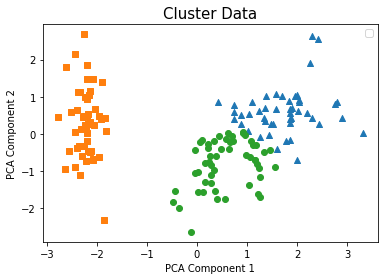

In [24]:
# 군집화된 결과를 차원축소하여 시각화

markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_data = df[df.Cluster == i]['PC1']
    y_data = df[df.Cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker)

plt.title('Cluster Data', fontsize=15)
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

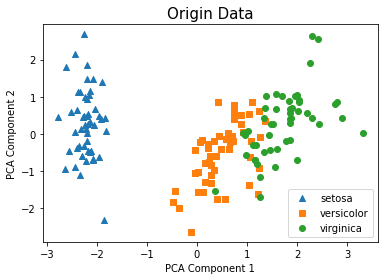

In [23]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker,label=iris.target_names[i])
plt.title('Origin Data', fontsize=15)
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- 두개의 그림 비교

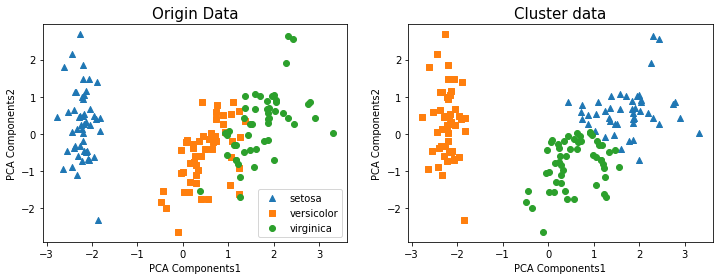

In [28]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target', 'Cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        ax.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
    if column == 'target':
        ax.legend()
        ax.set_title('Origin Data', fontsize = 15)
    else:
        ax.set_title('Cluster data', fontsize = 15)

    ax.set_xlabel('PCA Components1')
    ax.set_ylabel('PCA Components2')

plt.show()

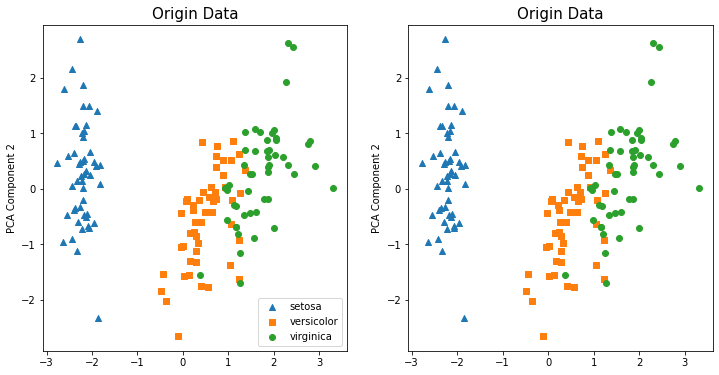

In [30]:
plt.figure(figsize=(12,6))
for k in range(1,3):
    plt.subplot(1,2,k)
    markers = ['^','s','o']

    for i, marker in enumerate(markers):
        x_data = df[df.target == i]['PC1']
        y_data = df[df.target == i]['PC2']
        plt.scatter(x_data, y_data, marker=marker,label=iris.target_names[i])

    if k == 1:      #target
        plt.title('Origin Data', fontsize=15)
        plt.legend()
        plt.ylabel('PCA Component 2')
    else:
        plt.title('Origin Data', fontsize=15)
        plt.ylabel('PCA Component 2')
plt.show()